# 信息熵


## 信息量

$$
I_i=\log_2(\frac{1}{p_i})=-\log_2{p_i}
$$

其中，$I_i$ 为$i$的信息量，$p_i$ 为$i$出现的概率。显然，当$i$出现的机率越小的时候它的信息量就越大。

## 信息熵

$$
H(X)=\sum_{i=1}^{n}(p_i \times \log_2(\frac{1}{p_i}))
$$

信息熵：信息量的期望



设有 __模型1__ 和 __模型2__ 对选情进行预测：

__模型1__

| Prediction  | Ground truth | Correct  |
|-------------|--------------|----------|
| 0.3 0.3 0.4 | 0 0 1        | yes      |
| 0.3 0.4 0.3 | 0 1 0        | yes      |
| 0.1 0.2 0.7 | 1 0 0        | no       |

__模型2__

| Prediction  | Ground truth | Correct  |
|-------------|--------------|----------|
| 0.1 0.2 0.7 | 0 0 1        | yes      |
| 0.1 0.7 0.2 | 0 1 0        | yes      |
| 0.3 0.4 0.3 | 1 0 0        | no       |

从 Correct 列来看(accurary)，两个模型的表现都是2对1对，但从具体的 prediction 来看，显然 __模型2__ 的表现更好。


##  Classification Error（分类错误率）

$$
\text{classification error} = \frac{\text{count of error items}}{\text{count of all items}}
$$

显然，按 accuracy 来判断模型的优质程序不够精细。

## Mean Squared Error （均方误差）

$$
MSE = \frac{1}{n}\sum_{i}^{n}(\hat{y_i} - y_i)^2
$$


__模型一__:

$$
loss_1 = (0.3-0)^2 + (0.3-0)^2 + (0.4-1)^2 = 0.54\\
loss_2 = (0.3-0)^2 + (0.4-1)^2 + (0.3-0)^2 = 0.54\\
loss_3 = (0.1-1)^2 + (0.2-0)^2 + (0.7-0)^2 = 1.32\\
L = \frac{0.54 + 0.54 + 1.32}{3} = 0.8
$$


__模型二__:

$$
loss_1 = (0.1-0)^2 + (0.2-0)^2 + (0.7-1)^2 = 0.138\\
loss_2 = (0.1-0)^2 + (0.7-1)^2 + (0.2-0)^2 = 0.138\\
loss_3 = (0.3-1)^2 + (0.4-0)^2 + (0.3-0)^2 = 0.72\\
L = \frac{0.138 + 0.138 + 0.72}{3} = 0.332
$$

显然，MSE 可以更好地反映出模型的表现差异。但它的问题在训练时开始阶段的梯度下降速率非常慢。


## Cross Entropy Error Function （交叉熵损失函数）

### 二分类

$$
L = \frac{1}{N}\sum_{i}L_i = \frac{1}{N}\sum_i-[y_i\log(p_i)+(1-y_i)\log(1-p_i)]
$$

* $y_i$: 样本$i$的label, 正类为1, 负类为0
* $p_i$: 样本$i$预测为正的概率

### 多分类

$$
L = \frac{1}{N}\sum_{i}L_i = \frac{1}{N}\sum_i -\sum_{c=1}^{M}y_{ic}\log(p_{ic})
$$

* $M$： 类别的数量 
* $y_{ic}： 指示变量（0或1），如果该类别和样本$i$的类别相同就是1,否则是0
* $p_{ic}： 对于难测样本$i$属于类别$c$的预测查概率

__模型一__:

$$
loss_1 = -(0 \times \log 0.3 + 0 \times \log 0.3 + 1 \times \log 0.4) = 0.91\\
loss_2 = -(0 \times \log 0.3 + 1 \times \log 0.4 + 0 \times \log 0.3) = 0.91\\
loss_3 = -(1 \times \log 0.1 + 0 \times \log 0.2 + 0 \times \log 0.7) = 2.30\\
L = \frac{0.91 + 0.91 + 2.30}{3}=1.37
$$


__模型二__:

$$
loss_1 = -(0 \times \log 0.1 + 0 \times \log 0.2 + 1 \times \log 0.7) = 0.35\\
loss_2 = -(0 \times \log 0.1 + 1 \times \log 0.7 + 0 \times \log 0.2) = 0.35\\
loss_3 = -(1 \times \log 0.3 + 0 \times \log 0.4 + 0 \times \log 0.4) = 1.20\\
L = \frac{0.35 + 0.35 + 1.20}{3}=0.63
$$

可以发现，交叉熵损失函数也可以反映出 __模型一__ 和 __模型二__ 的优劣

### 函数性质

<ipython-input-1-f5324e002a15>:6: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)  # 二分类化简


Text(0, 0.5, 'loss')

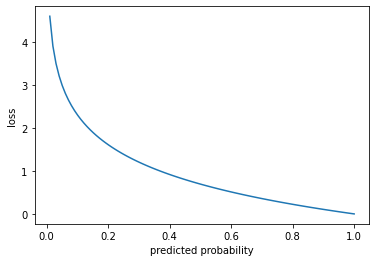

In [1]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1, 100)
y = -np.log(x)  # 二分类化简

plt.plot(x, y)
plt.xlabel('predicted probability')
plt.ylabel('loss')

可以看出，该函数是 __凸函数__ ，求导时能够得到全局最优值。